In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
from collections import OrderedDict
%matplotlib inline

In [206]:
#folder = "results/single"
folder = "results/multi"

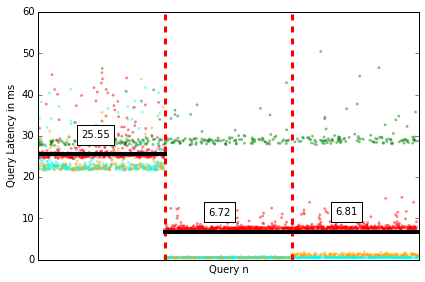

In [222]:
df = pd.DataFrame()
for filename in sorted(os.listdir(folder)):
#     print(filename)
    df = df.append(pd.read_csv(folder+ "/" +filename,header=False,names=["QueryLatency","column"]))
#     print(pd.read_csv(folder+ "/" +filename,header=False,names=["QueryLatency"]).mean())


df['t'] = range(0, len(df))
colors = {0:'red', 1:'green', 12:'cyan', 34:'orange'}

# colors = [cm.hsv(i*60) for i in range(5) ]

columnColors = [colors[df["column"].tolist()[i]] for i in range(len(df))]

ax = df.plot(kind='scatter', legend=False, rot=0, c=columnColors, x='t', y='QueryLatency', alpha=0.5, edgecolors='none', s=8)
ax.axis([0, 3000, 0, 60])
ax.get_xaxis().set_ticks([])
plt.tight_layout()
plt.ylabel("Query Latency in ms")
plt.xlabel("Query n")
# plt.savefig("results/figures/single_scatter_only.png", dpi=250)

# print(df.iloc[0:1000]["QueryLatency"].mean())
# print(df.iloc[1000:2000]["QueryLatency"].mean())
# print(df.iloc[2000:3000]["QueryLatency"].mean())
# print(df.iloc[3000:4000]["QueryLatency"].mean())

plt.axvline(1000, color='red', lw=3, linestyle='--')
plt.axvline(2000, color='red', lw=3, linestyle='--')
# plt.axvline(2000, color='grey', lw=3, linestyle='--')
#plt.axvline(3000, color='red', lw=3, linestyle='--')
# # plt.savefig("results/figures/single_with_time.png", dpi=250)

ax.text(350,df.iloc[0:1000]["QueryLatency"].mean()+4, str(round(df.iloc[0:1000]["QueryLatency"].mean(),2)), color='black', bbox={'facecolor':'white', 'pad':10})
plt.plot([0, 1000], [df.iloc[0:1000]["QueryLatency"].mean(), df.iloc[0:1000]["QueryLatency"].mean()], 'black', lw=4)
# # plt.savefig("results/figures/single_with_first_avg.png", dpi=250)


ax.text(1350,df.iloc[1000:2000]["QueryLatency"].mean()+4, str(round(df.iloc[1000:2000]["QueryLatency"].mean(),2)), color='black', bbox={'facecolor':'white', 'pad':10})
ax.text(2350,df.iloc[2000:3000]["QueryLatency"].mean()+4, str(round(df.iloc[2000:3000]["QueryLatency"].mean(),2)), color='black', bbox={'facecolor':'white', 'pad':10})
# ax.text(3350,df.iloc[3000:4000]["QueryLatency"].mean()+4, str(round(df.iloc[3000:4000]["QueryLatency"].mean(),2)), color='black', bbox={'facecolor':'white', 'pad':10})




plt.plot([1000, 2000], [df.iloc[1000:2000]["QueryLatency"].mean(), df.iloc[1000:2000]["QueryLatency"].mean()], 'black', lw=4)
plt.plot([2000, 3000], [df.iloc[2000:3000]["QueryLatency"].mean(), df.iloc[2000:3000]["QueryLatency"].mean()], 'black', lw=4)
# plt.plot([3000, 4000], [df.iloc[3000:4000]["QueryLatency"].mean(), df.iloc[3000:4000]["QueryLatency"].mean()], 'black', lw=4)





plt.savefig("results/figures/multi.pdf")
plt.savefig("results/figures/multi.png", dpi=250)
# plt.clf()

ax